# Trabajo Sprint 2

## Objetivos de negocio
Elaborar una herramienta que asista al asesor de forma automatica en la evaluacion del inmueble empleando tecnicas de machine learning

## Evaluar la situacion
Tenemos datos

No tenemos certeza sobre la calidad de los datos

Contamos con herramientas aprendidas en el sprint 1

Tiempo de entrega limitado

## Objetivos de mineria de datos

### Encoding, outliers, imputacion de faltantes, escalado 
 Entrenar el modelo y compararlo con el trabajo del sprint 1 para ver si mejora
 
 Usar modelos avanzados
 
 Optimizar hiperparametros
 
 Comparacion de resultados de modelos
 
 Interpretacion del modelo

## Importamos librerias y dataset

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [389]:
from pandas_profiling import ProfileReport

In [390]:
df_propiedades = pd.read_csv("C:/Users/Lucas/Desktop/ACAMICA/Sprint 1/Properti.csv") #decimal=","
#df_propiedades['index'] = df_propiedades.index 

In [391]:
base_properati= df_propiedades.copy()
base_properati= df_propiedades.dropna()
base_properati= df_propiedades.reset_index()
base_properati.head()

index  start_date    end_date  created_on        lat        lon         l1  \
0      0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1      1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2      2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3      3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4      4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

### Eliminamos columnas que son innecesarias y renombramos algunas para mayor facilidad

In [392]:
df_propiedades=base_properati.drop(columns=['lat', 'lon','l1','start_date','end_date','created_on','currency','title','description'])

In [393]:
df_propiedades.rename(columns={'l2':'Zona',
                        'l3':'Barrio'},
               inplace=True)

### Agregamos las columnas rooms por m2, precio por m2 para analizar el valor de los barrios

In [394]:
df_propiedades['rooms_m2'] = df_propiedades['rooms'] / df_propiedades['surface_total']

In [395]:
df_propiedades['bathrooms_m2'] = df_propiedades['bathrooms'] / df_propiedades['surface_total']

### Vemos la forma del dataset y sus faltantes

In [396]:
df_propiedades.shape

(146660, 13)

### Utilizamos la funcion de pandas profiling para hacer un analisis exploratorio de los datos

In [397]:
profile = ProfileReport(df_propiedades, title="Pandas Profiling Report"
)

In [11]:
profile

### Con esta funcion podemos ver informacion muy importantes como distribuciones y correlaciones entre variables, valores faltantes, cantidad de variables numericas y categoricas, minimos y maximos, etc

### Al analizar que los faltantes no superan el 5% de los datos, decidimos eliminarlos

In [398]:
df_propiedades.isna().sum()

df_index               0
Zona                   0
Barrio                 0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
operation_type         0
rooms_m2           20527
bathrooms_m2       22579
dtype: int64

In [399]:
df_propiedades = df_propiedades.dropna()

In [400]:
df_propiedades.describe()

df_index          rooms       bedrooms      bathrooms  \
count  122818.000000  122818.000000  122818.000000  122818.000000   
mean    70639.633506       3.130950       2.068345       1.591648   
std     42960.399092       1.394685       1.084066       0.879062   
min         0.000000       1.000000       0.000000       1.000000   
25%     33708.250000       2.000000       1.000000       1.000000   
50%     69249.500000       3.000000       2.000000       1.000000   
75%    108170.750000       4.000000       3.000000       2.000000   
max    146659.000000      35.000000      15.000000      14.000000   

       surface_total  surface_covered         price       rooms_m2  \
count  122818.000000    122818.000000  1.228180e+05  122818.000000   
mean      191.389650       112.118582  2.441321e+05       0.034730   
std      1490.906401       898.847733  2.999523e+05       0.015034   
min        10.000000         1.000000  6.000000e+03       0.000018   
25%        52.000000        47.000000  1.150000e+05       0.025000   
50%        78.000000        68.000000  1.700000e+05       0.035294   
75%       138.000000       108.000000  2.690000e+05       0.044444   
max    169000.000000    126062.000000  3.243423e+07       1.000000   

        bathrooms_m2  
count  122818.000000  
mean        0.017901  
std         0.008999  
min         0.000006  
25%         0.012048  
50%         0.017699  
75%         0.023256  
max         0.315789

### Despues de hacer el analisis exploratorio de las variables, decidimos centrarnos en aquellos datos de capital federal y que son departamentos, ya que la mayor parte de propiedades se encuentran aqui, y consideramos que es representativo de la poblacion

In [401]:
df_propiedades_filt =df_propiedades.loc[df_propiedades["Zona"].isin(["Capital Federal"])]
df_propiedades_filt =df_propiedades.loc[df_propiedades["property_type"].isin(["Departamento"])]

## Vemos la cantidad de instancias que quedan para trabajar

In [402]:
df_propiedades_filt.shape

(92087, 13)

### Procedemos a ver los boxplots de variables price, rooms, bathrooms, surface total y rooms_m2 para ver outliers, y luego veremos la correlacion de las variables

<AxesSubplot:>

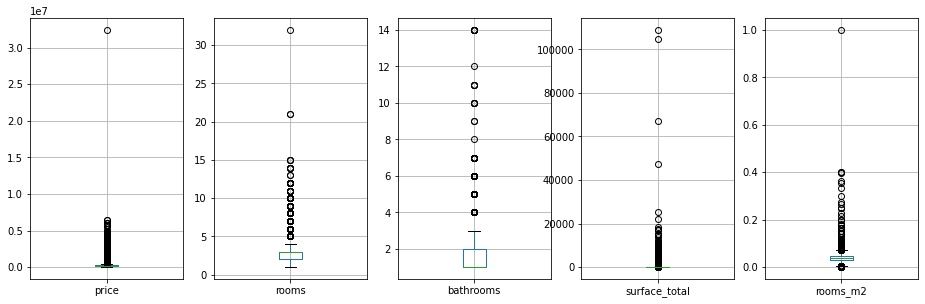

In [403]:
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,6,1)
df_propiedades_filt.boxplot("price")

plt.subplot(1,6,2)
df_propiedades_filt.boxplot("rooms")

plt.subplot(1,6,3)
df_propiedades_filt.boxplot("bathrooms")

plt.subplot(1,6,4)
df_propiedades_filt.boxplot("surface_total")

plt.subplot(1,6,5)
df_propiedades_filt.boxplot("rooms_m2")

# plt.subplot(1,6,6)
# df_propiedades_filt.boxplot("bathrooms_m2")

## Eliminamos la columna indice

In [404]:
df_propiedades_filt=df_propiedades_filt.drop(columns=['df_index'])

In [405]:
corr_inicial =df_propiedades_filt.corr()

In [406]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(corr_inicial, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


### En este heatmap podemos observar que solo las variables bathrooms, bedrooms y rooms tienen una correlacion significativa con la variable dependiente price

### Para mejorar la calidad de nuestros datos, procedemos a eliminar outliers de las variables price, precio m2 cubierto y superficie total con el metodo del rango intercuartilico. Tambien vemos la cantidad de instancias que van quedando

# PRICE

In [407]:
Q1 = df_propiedades_filt.price.quantile(0.25)
Q3 = df_propiedades_filt.price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

146000.0


In [408]:
df_propiedades_filt = df_propiedades_filt[~((df_propiedades_filt.price < (Q1-1.5 * IQR)) |(df_propiedades_filt.price > (Q3 + 1.5 * IQR)))]
df_propiedades_filt.shape

(84337, 12)

# ROOMS_M2

In [409]:
Q1 = df_propiedades_filt.rooms_m2.quantile(0.25)
Q3 = df_propiedades_filt.rooms_m2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.015296052631578946


In [410]:
df_propiedades_filt = df_propiedades_filt[~((df_propiedades_filt.rooms_m2 < (Q1-1.5 * IQR)) |(df_propiedades_filt.rooms_m2 > (Q3 + 1.5 * IQR)))]
df_propiedades_filt.shape

(83311, 12)

# SURFACE_TOTAL

In [411]:
 Q1 = df_propiedades_filt.surface_total.quantile(0.25)
 Q3 = df_propiedades_filt.surface_total.quantile(0.75)
 IQR = Q3 - Q1
 print(IQR)

40.0


In [412]:
 df_propiedades_filt = df_propiedades_filt[~((df_propiedades_filt.surface_total < (Q1-1.5 * IQR)) |(df_propiedades_filt.surface_total > (Q3 + 1.5 * IQR)))]
 df_propiedades_filt.shape

(79433, 12)

### Decidimos filtrar aquellas propiedades que tengan mayor cantidad de m2 cubiertos que totales y ver cuantas instancias quedan

In [413]:
df_propiedades_filt=df_propiedades_filt[(df_propiedades_filt.surface_total>=df_propiedades_filt.surface_covered)]

In [414]:
df_propiedades_filt.shape

(78772, 12)

In [415]:
df_propiedades_filt.head()

Zona         Barrio  rooms  bedrooms  bathrooms  \
0            Capital Federal  San Cristobal    7.0       7.0        2.0   
11           Capital Federal          Boedo    2.0       1.0        1.0   
12           Capital Federal          Boedo    2.0       1.0        1.0   
13  Bs.As. G.B.A. Zona Norte          Pilar    1.0       1.0        1.0   
14  Bs.As. G.B.A. Zona Norte          Pilar    1.0       1.0        1.0   

    surface_total  surface_covered     price property_type operation_type  \
0           140.0            140.0  153000.0  Departamento          Venta   
11           68.0             59.0  149000.0  Departamento          Venta   
12           50.0             44.0  115000.0  Departamento          Venta   
13           50.0             35.0   45000.0  Departamento          Venta   
14           32.0             32.0   35000.0  Departamento          Venta   

    rooms_m2  bathrooms_m2  
0   0.050000      0.014286  
11  0.029412      0.014706  
12  0.040000      0.020000  
13  0.020000      0.020000  
14  0.031250      0.031250

### Despues de la eliminacion de outliers, vemos como quedan ahora los boxplots y las nuevas correlaciones

In [416]:
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,6,1)
df_propiedades_filt.boxplot("price")

plt.subplot(1,6,2)
df_propiedades_filt.boxplot("rooms")

plt.subplot(1,6,3)
df_propiedades_filt.boxplot("bathrooms")

plt.subplot(1,6,4)
df_propiedades_filt.boxplot("surface_total")

plt.subplot(1,6,5)
df_propiedades_filt.boxplot("rooms_m2")



<AxesSubplot:>

### Podemos observar como se "acortaron" nuestros boxplots con la eliminacion de outliers y nos permite ver mejor los datos de las variables

In [417]:
corr_inicial =df_propiedades_filt.corr()

In [418]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(corr_inicial, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### Aqui podemos analizar que las correlaciones de las variables mejoraron en general, y con la variable price ahora encontramos mejor correlacion tambien con las variables de surface total y covered alcanzando un 0.74

### Vemos la distribucion de la variable price

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

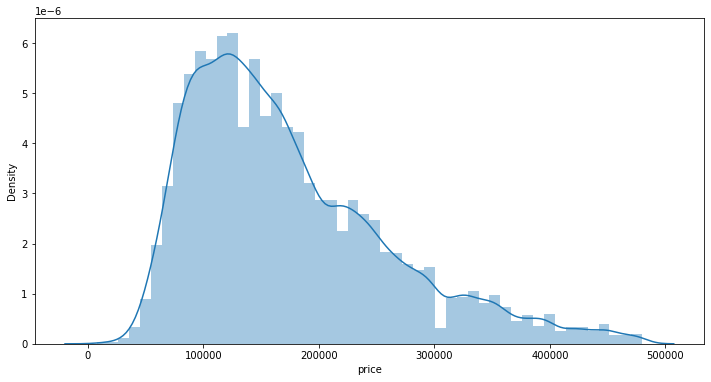

In [419]:
sns.distplot(df_propiedades_filt["price"])

### Se puede observar que tiene una distribucion cercana a una normal, con sesgo hacia la derecha

### Ahora procederemos a preparar el dataset para escalarlo

In [420]:
df_propiedades_filt= df_propiedades_filt.reset_index()

In [421]:
df_propiedades_filt.shape

(78772, 13)

In [422]:
df_propiedades_filt.isna().sum()

index              0
Zona               0
Barrio             0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
operation_type     0
rooms_m2           0
bathrooms_m2       0
dtype: int64

In [423]:
Barrio = df_propiedades_filt["Barrio"]

In [424]:
Barrio_DF = pd.DataFrame(Barrio, columns=["Barrio"])

In [425]:
Barrio.isna().sum()

0

In [426]:
Barrio_DF.isna().sum()

Barrio    0
dtype: int64

In [427]:
Barrio.shape

(78772,)

In [428]:
Barrio_DF.shape

(78772, 1)

### Proximo paso, escalado de datos. Usamos MinMaxScaler en las variable dependiente y las independientes

In [429]:
from sklearn.preprocessing import MinMaxScaler

### Definimos las variables independientes y dependiente, y usaremos las funciones fit y transform para tener los datos en una misma escala

In [430]:
variables_independientes=df_propiedades_filt[["rooms","bedrooms","bathrooms","surface_covered","surface_total","rooms_m2","bathrooms_m2"]]
variables_dependientes=df_propiedades_filt[["price"]]

In [431]:
scaler_variables_independientes = MinMaxScaler()
scaler_variables_dependientes = MinMaxScaler()

In [432]:
scaler_variables_independientes.fit(variables_independientes)
scaler_variables_dependientes.fit(variables_dependientes)

MinMaxScaler()

In [433]:
escalados_variable_dependiente =scaler_variables_dependientes.transform(variables_dependientes)
escalados_variable_independiente =scaler_variables_independientes.transform(variables_independientes)

### Pasamos nuestros datos a DataFrame con la funcion de pandas, y formamos nuestro dataset escalado

In [434]:
datos_escalados_var_dep = pd.DataFrame(escalados_variable_dependiente, columns=["price"])

In [435]:
datos_escalados_var_indep = pd.DataFrame(escalados_variable_independiente, columns=["rooms","bedrooms","bathrooms","surface_covered","surface_total","rooms_m2","bathrooms_m2"])

In [436]:
datos_escalados = datos_escalados_var_indep.join(datos_escalados_var_dep)

In [437]:
datos_escalados_df = datos_escalados.join(Barrio_DF)

In [438]:
datos_escalados_df.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_covered    0
surface_total      0
rooms_m2           0
bathrooms_m2       0
price              0
Barrio             0
dtype: int64

### Vemos como queda nuestro dataset escalado y usamos la funcion describe para ver sus principales datos estadisticos

In [439]:
datos_escalados_df.head()

rooms  bedrooms  bathrooms  surface_covered  surface_total  rooms_m2  \
0  0.750  0.466667   0.076923         0.952055       0.946970  0.676325   
1  0.125  0.066667   0.000000         0.397260       0.401515  0.339209   
2  0.125  0.066667   0.000000         0.294521       0.265152  0.512583   
3  0.000  0.066667   0.000000         0.232877       0.265152  0.185099   
4  0.000  0.066667   0.000000         0.212329       0.128788  0.369309   

   bathrooms_m2     price         Barrio  
0      0.024218  0.307937  San Cristobal  
1      0.025578  0.299471          Boedo  
2      0.042711  0.227513          Boedo  
3      0.042711  0.079365          Pilar  
4      0.079121  0.058201          Pilar

In [440]:
datos_escalados_df.describe()

rooms      bedrooms     bathrooms  surface_covered  \
count  78772.000000  78772.000000  78772.000000     78772.000000   
mean       0.197270      0.110046      0.025711         0.404779   
std        0.114344      0.051485      0.044820         0.160863   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.125000      0.066667      0.000000         0.280822   
50%        0.250000      0.066667      0.000000         0.369863   
75%        0.250000      0.133333      0.076923         0.500000   
max        1.000000      1.000000      1.000000         1.000000   

       surface_total      rooms_m2  bathrooms_m2         price  
count   78772.000000  78772.000000  78772.000000  78772.000000  
mean        0.396795      0.513050      0.046328      0.352490  
std         0.204922      0.171209      0.024817      0.183611  
min         0.000000      0.000000      0.000000      0.000000  
25%         0.234848      0.394474      0.029766      0.216929  
50%         0.356061      0.512583      0.044032      0.311958  
75%         0.515152      0.625155      0.058893      0.449735  
max         1.000000      1.000000      1.000000      1.000000

### Vemos la correlacion de las variables escaladas

In [441]:
corr_inicial =datos_escalados_df.corr()

In [442]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(corr_inicial, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### Vemos nuevamente la distribucion de la variable price para corroborar que quedo bien con el escalado

In [443]:
sns.distplot(datos_escalados_df["price"])

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

### Vemos la forma que tiene nuestro dataset para empezar a trabajar con modelos de machine learning

In [444]:
datos_escalados_df.shape

(78772, 9)

### Procedemos a entrenar nuestros datos con los modelos de regresion lineal, arbol de decision y KNN para ver las metricas y compararlas con el trabajo del sprint 1. Debemos recordar que las metricas seleccionadas fueron RSME y R2

### Primero importamos las funciones y creamos los modelos

In [445]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [446]:
from sklearn.metrics import mean_squared_error

In [447]:
from sklearn.metrics import r2_score

### Definimos X e y con las variables independientes y dependiente

In [448]:
X = datos_escalados_df[["bathrooms","rooms","surface_total","surface_covered","bedrooms"]]
y = datos_escalados_df["price"]

### Dividimos el dataset en train y test con la funcion train test split, con un 30% para test

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Definimos una funcion para predecir y en train y test, volver los datos a su escala real, calcular las metricas RSME y R2 que son las que evaluaremos y graficar la distribucion de los errores

In [450]:
def evaluar_modelo(model, scaler, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### VOLVEMOS A LAS VARIABLES NO ESCALADAS
    y_train_pred_desesc = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
    y_test_pred_desesc = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
   
    y_train_desesc = scaler.inverse_transform(y_train.values.reshape(-1, 1))
    y_test_desesc = scaler.inverse_transform(y_test.values.reshape(-1, 1))
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train_desesc, y_train_pred_desesc))
    rmse_test = np.sqrt(mean_squared_error(y_test_desesc, y_test_pred_desesc))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    r2=r2_score(y_test_desesc,y_test_pred_desesc)
    print(f'El valor del r2 score : {r2}')
    
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train_desesc - y_train_pred_desesc, bins = 20, label = 'train')
    sns.distplot(y_test_desesc - y_test_pred_desesc, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test_desesc,y_test_pred_desesc, s =2)
   
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
      ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
   
    plt.tight_layout()
    plt.show()

### Procederemos a entrenar los modelos y ver sus metricas utilizando la funcion evaluar_modelo y ver los resultados de sus metricas

## Arbol de decision

In [451]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

Raíz del error cuadrático medio en Train: 56860.00698899619
Raíz del error cuadrático medio en Test: 56748.61075923297
El valor del r2 score : 0.5750182360400321


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


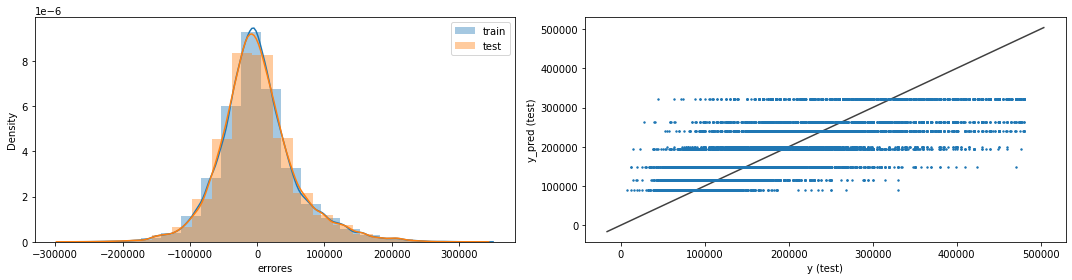

In [452]:
evaluar_modelo(tree_regressor, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

## KNN

In [453]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [454]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

Raíz del error cuadrático medio en Train: 46947.50490871458
Raíz del error cuadrático medio en Test: 51126.09402595938
El valor del r2 score : 0.6550588116575995


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


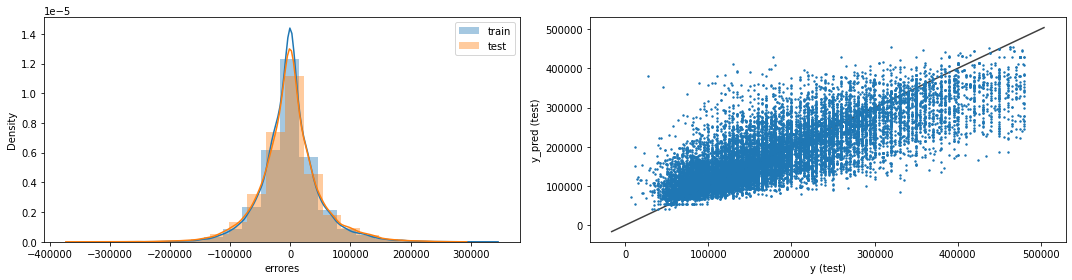

In [455]:
evaluar_modelo(knn_regressor, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

## Regresion lineal

In [456]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() #Benchmark

In [457]:
linear_model.fit(X_train, y_train)

LinearRegression()

Raíz del error cuadrático medio en Train: 55048.28343212348
Raíz del error cuadrático medio en Test: 54895.73169787301
El valor del r2 score : 0.6023170400269034


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


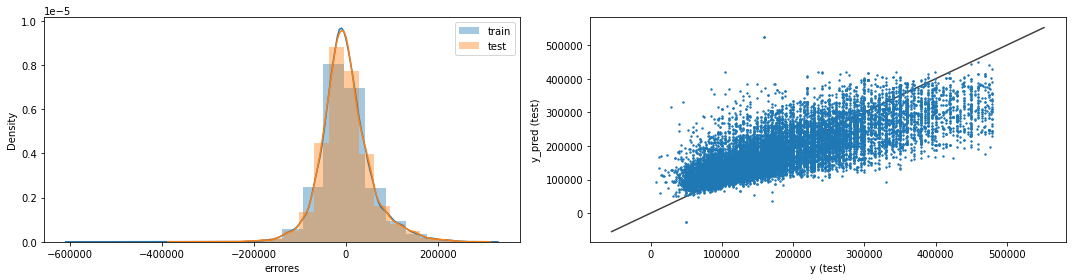

In [458]:
evaluar_modelo(linear_model, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

### Conclusion con el trabajo uno: los resultados de RSME rondan en valores similares, el R2 no ha mejorado y paso de 0.69 que fue el mejor obtenido a 0.655 con el modelo KNN, tambien debo destacar que nuestro dataset quedo con muchas mas instancias para analizar que en el trabajo 1. A continuacion procederemos a mejorar los modelos y probar algunos nuevos para hacer la comparacion final de metricas

## Nuestro dataset

In [459]:
datos_escalados_df.head()

rooms  bedrooms  bathrooms  surface_covered  surface_total  rooms_m2  \
0  0.750  0.466667   0.076923         0.952055       0.946970  0.676325   
1  0.125  0.066667   0.000000         0.397260       0.401515  0.339209   
2  0.125  0.066667   0.000000         0.294521       0.265152  0.512583   
3  0.000  0.066667   0.000000         0.232877       0.265152  0.185099   
4  0.000  0.066667   0.000000         0.212329       0.128788  0.369309   

   bathrooms_m2     price         Barrio  
0      0.024218  0.307937  San Cristobal  
1      0.025578  0.299471          Boedo  
2      0.042711  0.227513          Boedo  
3      0.042711  0.079365          Pilar  
4      0.079121  0.058201          Pilar

## Analizaremos la variable barrio

### Vemos la cantidad de propiedades por barrio, y la distribucion de la variable precio para asignarle un rago en base a los cuartiles

In [460]:
barrios = datos_escalados_df.groupby('Barrio')['Barrio'].count()
barrios = barrios.sort_values(ascending=False)
barrios.head(10)

Barrio
Palermo          8858
Tigre            6204
Almagro          5698
Villa Crespo     4973
Caballito        4463
Belgrano         4288
Recoleta         3630
Barrio Norte     2486
Villa Urquiza    2255
Balvanera        1818
Name: Barrio, dtype: int64

In [461]:
ax1=sns.catplot(data=datos_escalados_df, x='Barrio', kind='count', aspect=3)
plt.title('Cantidad de anuncios por Barrio')      
plt.xlabel('Barrios')  
plt.ylabel('Cantidad de Anuncios')  
plt.xticks(rotation=80)
plt.show()

In [462]:
datos_escalados_df["price"].describe()

count    78772.000000
mean         0.352490
std          0.183611
min          0.000000
25%          0.216929
50%          0.311958
75%          0.449735
max          1.000000
Name: price, dtype: float64

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

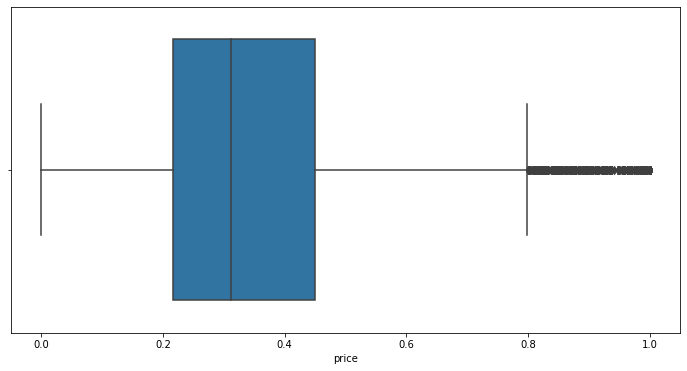

In [463]:
sns.boxplot(datos_escalados_df["price"])

### Asigno un rango de precios acuerdo a los cuartiles, para definir los rangos "Bajo","Medio","Medio Alto" y "Alto" y vemos cuantas propiedades hay en cada uno

In [464]:
rango_precio = [(datos_escalados_df["price"]<0.216929),(datos_escalados_df["price"]<0.311958),(datos_escalados_df["price"]< 0.449735),(datos_escalados_df["price"]<1.0)]
values = ["Bajo","Medio","Medio Alto", "Alto"]
datos_escalados_df["rango_precio"] = np.select(rango_precio,values)

### Creamos la variable data_rango que nos indica a que rango de precio pertenece cada propiedad

In [465]:
data_rango = datos_escalados_df.groupby(["rango_precio"])["price"].count()
print(data_rango)

rango_precio
0                59
Alto          20384
Bajo          19689
Medio         19709
Medio Alto    18931
Name: price, dtype: int64


In [466]:
datos_escalados_df.head(10)

rooms  bedrooms  bathrooms  surface_covered  surface_total  rooms_m2  \
0  0.750  0.466667   0.076923         0.952055       0.946970  0.676325   
1  0.125  0.066667   0.000000         0.397260       0.401515  0.339209   
2  0.125  0.066667   0.000000         0.294521       0.265152  0.512583   
3  0.000  0.066667   0.000000         0.232877       0.265152  0.185099   
4  0.000  0.066667   0.000000         0.212329       0.128788  0.369309   
5  0.125  0.066667   0.076923         0.568493       0.636364  0.188407   
6  0.125  0.066667   0.000000         0.335616       0.265152  0.512583   
7  0.125  0.066667   0.000000         0.280822       0.287879  0.475509   
8  0.125  0.066667   0.000000         0.383562       0.416667  0.325449   
9  0.125  0.066667   0.000000         0.397260       0.462121  0.288515   

   bathrooms_m2     price         Barrio rango_precio  
0      0.024218  0.307937  San Cristobal        Medio  
1      0.025578  0.299471          Boedo        Medio  
2      0.042711  0.227513          Boedo        Medio  
3      0.042711  0.079365          Pilar         Bajo  
4      0.079121  0.058201          Pilar         Bajo  
5      0.043365  0.439153          Tigre   Medio Alto  
6      0.042711  0.214815          Tigre         Bajo  
7      0.039048  0.291005          Tigre        Medio  
8      0.024218  0.269841          Tigre        Medio  
9      0.020568  0.406984          Tigre   Medio Alto

### Procedemos a ver esta clasificacion por barrio, es decir cuantas propiedades tiene cada barrio dentro de los rangos definidos, de alto a bajo y viceversa

In [467]:
barrio_precio = pd.crosstab(index=datos_escalados_df['Barrio'],
            columns=datos_escalados_df['rango_precio'], margins=True)


In [468]:
barrio_precio

rango_precio       0   Alto   Bajo  Medio  Medio Alto    All
Barrio                                                      
Abasto             0     96    120     53          87    356
Agronomía          0     12     20     40          11     83
Almagro            0   1180   1322   1271        1925   5698
Almirante Brown    0      3     29      6           5     43
Avellaneda         0     27    476    158          79    740
...               ..    ...    ...    ...         ...    ...
Villa Santa Rita   0      7     47    104          35    193
Villa Soldati      0      0     24      2           0     26
Villa Urquiza      0    559    289    734         673   2255
Villa del Parque   0    137    174    299         217    827
All               59  20384  19689  19709       18931  78772

[90 rows x 6 columns]

In [469]:
barrio_precio_alto = barrio_precio.sort_values(["Alto"],ascending=False)
barrio_precio_alto.head(10)

rango_precio    0   Alto   Bajo  Medio  Medio Alto    All
Barrio                                                   
All            59  20384  19689  19709       18931  78772
Palermo        13   3486    634   1997        2728   8858
Tigre           0   2331    266   1634        1973   6204
Belgrano        6   2066    256    882        1078   4288
Recoleta        7   1999    297    597         730   3630
Barrio Norte    1   1194    253    447         591   2486
Almagro         0   1180   1322   1271        1925   5698
Caballito       0   1177    908   1185        1193   4463
Vicente López   6    694    121    304         414   1539
Villa Crespo    0    625   1442   1614        1292   4973

### En la tabla podemos ver los barrios que tienen mas propiedades dentro del rango de precio "Alto"

### Procedemos a analizar el rango alto, para ver cuantas propiedades tienen cada barrio en ese rango y asi poder armar una nueva variable, dependiendo la cantidad de propiedades que tenga en este

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alto'>

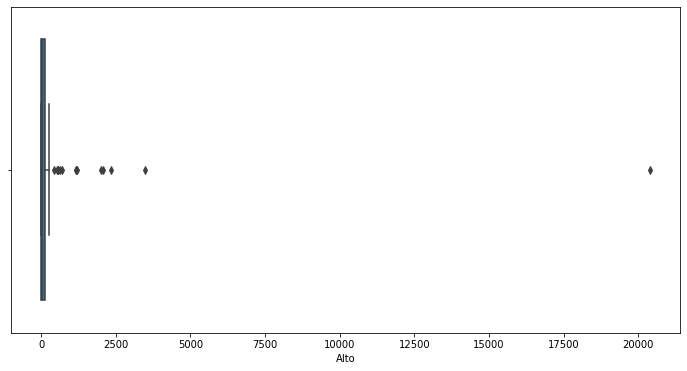

In [470]:
sns.boxplot(barrio_precio_alto["Alto"])

In [471]:
barrio_precio_alto["Alto"].describe()

count       90.000000
mean       452.977778
std       2196.964192
min          0.000000
25%          3.000000
50%         27.000000
75%        144.500000
max      20384.000000
Name: Alto, dtype: float64

### Ahora armamos la nueva variable en base a los cuartiles y vemos que definicion tiene cada barrio, si se lo considera caro, medio caro, medio barato o barato

In [472]:
rango_barrios = [(barrio_precio["Alto"]<3.000000),(barrio_precio["Alto"]<27.000000),(barrio_precio["Alto"]<144.000000),(barrio_precio["Alto"]<20384.000000)]
values = ["0","1","2", "3"]
barrio_precio["rango_barrios"] = np.select(rango_barrios,values)

### Definimos como 0 a los barrios mas baratos, 1 a los medio-baratos, 2 a los medio-caro, y 3 a los caros

In [473]:
barrio_precio

rango_precio       0   Alto   Bajo  Medio  Medio Alto    All rango_barrios
Barrio                                                                    
Abasto             0     96    120     53          87    356             2
Agronomía          0     12     20     40          11     83             1
Almagro            0   1180   1322   1271        1925   5698             3
Almirante Brown    0      3     29      6           5     43             1
Avellaneda         0     27    476    158          79    740             2
...               ..    ...    ...    ...         ...    ...           ...
Villa Santa Rita   0      7     47    104          35    193             1
Villa Soldati      0      0     24      2           0     26             0
Villa Urquiza      0    559    289    734         673   2255             3
Villa del Parque   0    137    174    299         217    827             2
All               59  20384  19689  19709       18931  78772             0

[90 rows x 7 columns]

In [474]:
barrio_precio.head(20)

rango_precio          0  Alto  Bajo  Medio  Medio Alto   All rango_barrios
Barrio                                                                    
Abasto                0    96   120     53          87   356             2
Agronomía             0    12    20     40          11    83             1
Almagro               0  1180  1322   1271        1925  5698             3
Almirante Brown       0     3    29      6           5    43             1
Avellaneda            0    27   476    158          79   740             2
Balvanera             0   182   796    547         293  1818             3
Barracas              0   157    85     95         116   453             3
Barrio Norte          1  1194   253    447         591  2486             3
Belgrano              6  2066   256    882        1078  4288             3
Berazategui           0    32    76     61          32   201             2
Boca                  0     3   134     57          22   216             1
Boedo                 0    30   229    147          61   467             2
Caballito             0  1177   908   1185        1193  4463             3
Catalinas             0     1     1      2           1     5             0
Cañuelas              0     0     6      2           0     8             0
Centro / Microcentro  0    32   162    121          97   412             2
Chacarita             0    51   138    146         112   447             2
Coghlan               0   108    36    136         101   381             2
Colegiales            0   278   103    414         253  1048             3
Congreso              0    51   202    130         112   495             2

### Luego procedemos a concatenar la ultima variable a nuestro data frame, definiendo asi si la propiedad pertenece a un barrio barato, medio-barato, medio-caro o caro

In [475]:
df_propiedades2 = pd.merge(datos_escalados_df, barrio_precio, on='Barrio')

In [476]:
df_propiedades2=df_propiedades2.drop(columns=['0', 'Alto','Bajo','Medio Alto','Alto','Medio','All'])

### Ahora vemos como queda nuestro dataset con las nuevas variables que creamos en base a los rangos armados

In [477]:
df_propiedades2

rooms  bedrooms  bathrooms  surface_covered  surface_total  rooms_m2  \
0      0.750  0.466667   0.076923         0.952055       0.946970  0.676325   
1      0.250  0.133333   0.076923         0.541096       0.553030  0.415826   
2      0.250  0.133333   0.000000         0.363014       0.295455  0.767292   
3      0.250  0.133333   0.000000         0.917808       0.909091  0.221486   
4      0.125  0.066667   0.000000         0.376712       0.310606  0.442408   
...      ...       ...        ...              ...            ...       ...   
78767  0.000  0.066667   0.000000         0.232877       0.151515  0.325449   
78768  0.250  0.133333   0.000000         0.335616       0.265152  0.840066   
78769  0.250  0.066667   0.000000         0.369863       0.303030  0.750753   
78770  0.250  0.133333   0.000000         0.335616       0.265152  0.840066   
78771  0.250  0.133333   0.000000         0.349315       0.280303  0.802280   

       bathrooms_m2     price            Barrio rango_precio rango_barrios  
0          0.024218  0.307937     San Cristobal        Medio             2  
1          0.051538  0.216931     San Cristobal        Medio             2  
2          0.037917  0.184127     San Cristobal         Bajo             2  
3          0.001957  0.322751     San Cristobal   Medio Alto             2  
4          0.035776  0.210582     San Cristobal         Bajo             2  
...             ...       ...               ...          ...           ...  
78767      0.070452  0.153439          Cañuelas         Bajo             0  
78768      0.042711  0.153439        Marcos Paz         Bajo             0  
78769      0.036827  0.153439        Marcos Paz         Bajo             0  
78770      0.042711  0.153439        Marcos Paz         Bajo             0  
78771      0.040222  0.164021  Presidente Perón         Bajo             0  

[78772 rows x 11 columns]

## Ahora generaremos encoding para esta ultima variable que creamos 

In [478]:
df_propiedades2 = pd.get_dummies(
    df_propiedades2, columns=["rango_barrios"], prefix="rb")

In [479]:
df_propiedades2.head(5)

rooms  bedrooms  bathrooms  surface_covered  surface_total  rooms_m2  \
0  0.750  0.466667   0.076923         0.952055       0.946970  0.676325   
1  0.250  0.133333   0.076923         0.541096       0.553030  0.415826   
2  0.250  0.133333   0.000000         0.363014       0.295455  0.767292   
3  0.250  0.133333   0.000000         0.917808       0.909091  0.221486   
4  0.125  0.066667   0.000000         0.376712       0.310606  0.442408   

   bathrooms_m2     price         Barrio rango_precio  rb_0  rb_1  rb_2  rb_3  
0      0.024218  0.307937  San Cristobal        Medio     0     0     1     0  
1      0.051538  0.216931  San Cristobal        Medio     0     0     1     0  
2      0.037917  0.184127  San Cristobal         Bajo     0     0     1     0  
3      0.001957  0.322751  San Cristobal   Medio Alto     0     0     1     0  
4      0.035776  0.210582  San Cristobal         Bajo     0     0     1     0

## Probaremos los modelos con nuestros nuevos cambios para ver si mejoran las metricas, para eso definimos la X e y nuevamente

In [480]:
X_con_barrio = df_propiedades2[["bathrooms","rooms","surface_total","surface_covered","bedrooms","rb_0","rb_1","rb_2","rb_3"]]
y2_con_barrio = df_propiedades2["price"]

In [481]:
X_train, X_test, y_train, y_test = train_test_split(X_con_barrio, y2_con_barrio, test_size=0.30, random_state=42)

# Arbol de decision

In [482]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

Raíz del error cuadrático medio en Train: 54722.767365061365
Raíz del error cuadrático medio en Test: 55070.0888354492
El valor del r2 score : 0.6024593471503825


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


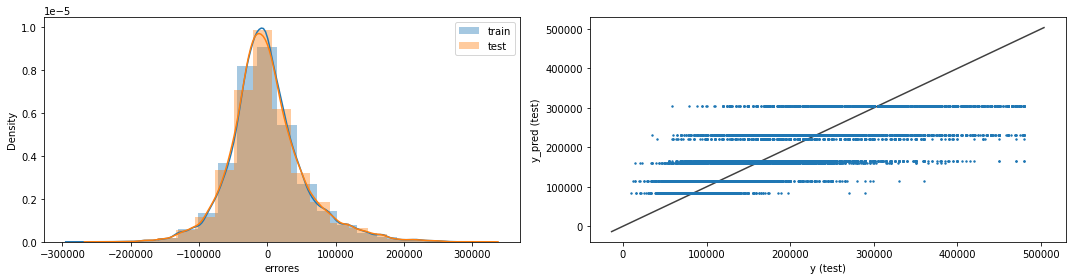

In [483]:
evaluar_modelo(tree_regressor, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

# KNN

In [484]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [485]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [486]:
evaluar_modelo(knn_regressor, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

Raíz del error cuadrático medio en Train: 41351.79588631548
Raíz del error cuadrático medio en Test: 45310.537561561214
El valor del r2 score : 0.7308784832456721


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


# REGRESION LINEAL

In [487]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() #Benchmark

In [488]:
linear_model.fit(X_train, y_train)

LinearRegression()

Raíz del error cuadrático medio en Train: 50354.012253278284
Raíz del error cuadrático medio en Test: 51095.21732701635
El valor del r2 score : 0.6577759757588639


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


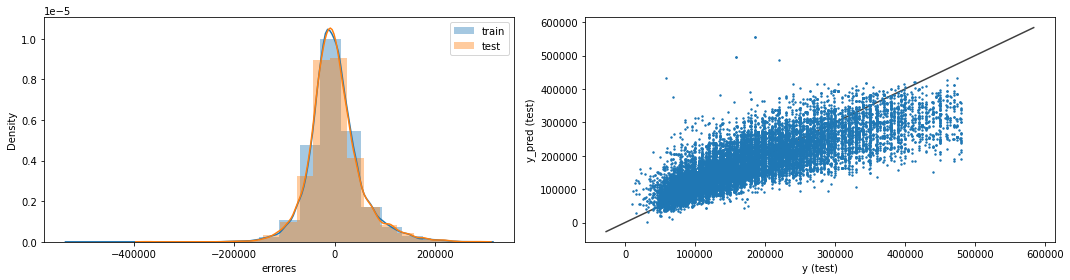

In [489]:
evaluar_modelo(linear_model, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

### Se puede observar que en los tres modelos, las metricas mejoraron. Y que por ahora los mejores resultados los tiene el modelo de KNN

## Aplicaremos PCA sobre las variables para ver si podemos reducir dimensionalidad, para eso graficaremos el porcentaje de variabilidad explicada según la cantidad de componentes

In [490]:
X3 = df_propiedades2[["bathrooms","rooms","surface_total","surface_covered","bedrooms","rb_0","rb_1","rb_2","rb_3"]]
y3 = df_propiedades2["price"]

In [491]:
from sklearn.decomposition import PCA

In [492]:
pca = PCA().fit(X3)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [493]:
pca.components_

array([[-1.53500435e-02, -2.25536013e-02, -6.63557812e-02,
        -5.08343914e-02, -1.04041297e-02,  2.31044109e-02,
         2.03130639e-01,  5.66872630e-01, -7.93107680e-01],
       [-1.34535529e-02, -4.46278947e-02, -9.53895859e-02,
        -7.45800770e-02, -1.84715257e-02,  2.68406970e-02,
         7.69745614e-01, -5.88452544e-01, -2.08133766e-01],
       [ 9.53728114e-02,  3.46460271e-01,  7.15275846e-01,
         5.58135984e-01,  1.50872538e-01, -2.86218249e-03,
         1.23324231e-01, -2.48837315e-02, -9.55783169e-02],
       [-5.01280510e-03,  3.09407077e-02, -6.94228441e-03,
         3.43512526e-03,  1.58708960e-02,  8.64766688e-01,
        -3.17748687e-01, -2.85871526e-01, -2.61146475e-01],
       [-2.17413555e-02,  8.13821772e-01, -4.77428564e-01,
         2.30137991e-02,  3.27899219e-01, -2.95970815e-02,
         7.50486150e-03,  5.59052163e-03,  1.65016984e-02],
       [-1.33217387e-01,  2.80235638e-01,  4.96557171e-01,
        -8.07177035e-01,  7.47591467e-02, -3.817178

In [494]:
pca.explained_variance_ratio_

array([5.84571974e-01, 2.23302899e-01, 1.38713972e-01, 3.63482549e-02,
       1.01624854e-02, 3.93354656e-03, 2.32428248e-03, 6.42585060e-04,
       6.96547966e-30])

### Podemos observar que en los primeros 4 componentes principales se explica aprox el 99% por lo que dejaremos esos 4

In [495]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X3) 

In [496]:
pca.explained_variance_ratio_

array([0.58457197, 0.2233029 , 0.13871397, 0.03634825])

In [497]:
X_pca.shape

(78772, 4)

In [498]:
y3.size

78772

## Probaremos los modelos con estos componentes principales

Primero dividimos el dataset en train test con los nuevos componentes principales

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y3, test_size=0.30, random_state=42)

## Arbol de decision

In [500]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

Raíz del error cuadrático medio en Train: 54353.07550807931
Raíz del error cuadrático medio en Test: 55000.47706728597
El valor del r2 score : 0.6034637405658134


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


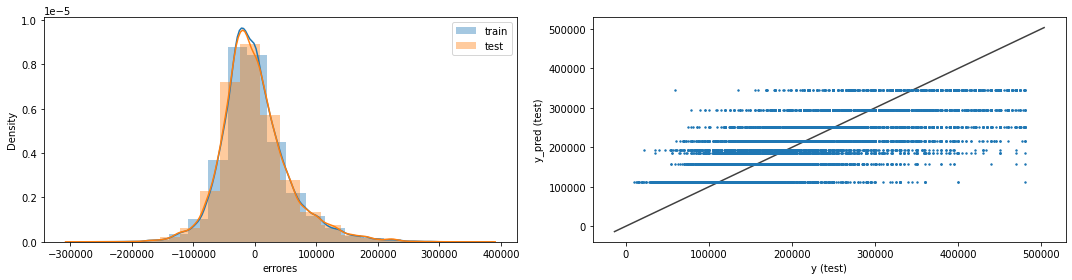

In [501]:
evaluar_modelo(tree_regressor, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

## KNN

In [502]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [503]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

Raíz del error cuadrático medio en Train: 42563.27752127613
Raíz del error cuadrático medio en Test: 46788.07779030446
El valor del r2 score : 0.7130406373547907


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


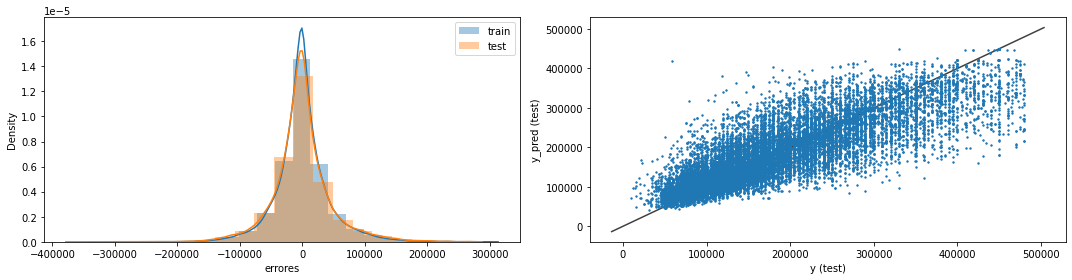

In [504]:
evaluar_modelo(knn_regressor, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

## Regresion lineal

In [505]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [506]:
evaluar_modelo(linear_model, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

Raíz del error cuadrático medio en Train: 52879.97626863161
Raíz del error cuadrático medio en Test: 53433.72623842265
El valor del r2 score : 0.6257335355299611


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


### Podemos ver que las metricas siguen ronando en los mismos valores, pero mejoramos la performance del modelo ya que tiene menos componentes (de 9 a 4)

## Optimizacion de hiperparametros

### Procederemos a realizar el proceso con Grid Search para los modelos, tambien se destaca que este metodo para optimizar hiperparametros incluye Cross Validation, el cual probaremos con 5 folds

In [319]:
from sklearn.model_selection import RandomizedSearchCV

In [320]:
import scipy as sp
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

### Veremos los parametros que necesitamos y armamos un diccionario para cada modelo

# KNN

In [321]:
knn_regressor.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [322]:
# Grilla para Random Search
param_dist_knn = {'n_neighbors':[20,40], 
                  'weights':['uniform'], 
                  'algorithm':['auto'], 
                  'leaf_size':[30],
                  'p':[1,2], 'metric':['minkowski']}

In [323]:
param_dist_knn

{'n_neighbors': [20, 40],
 'weights': ['uniform'],
 'algorithm': ['auto'],
 'leaf_size': [30],
 'p': [1, 2],
 'metric': ['minkowski']}

In [324]:
model_knn = KNeighborsRegressor()

In [325]:
knn_random = GridSearchCV(estimator = model_knn, param_grid=param_dist_knn,cv=5)

In [326]:
search_knn = knn_random.fit(X_pca, y3)

## Mejores hiperparametros para KNN

In [327]:
search_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 40,
 'p': 1,
 'weights': 'uniform'}

In [328]:
print("Mejor Score: "+str(search_knn.best_score_)+'\n')

Mejor Score: 0.5804466774674232



In [329]:
knn_random.best_estimator_

KNeighborsRegressor(n_neighbors=40, p=1)

In [330]:
mejor_knn = knn_random.best_estimator_

Raíz del error cuadrático medio en Train: 46302.976830322536
Raíz del error cuadrático medio en Test: 46477.41385772291
El valor del r2 score : 0.7168386972735283


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


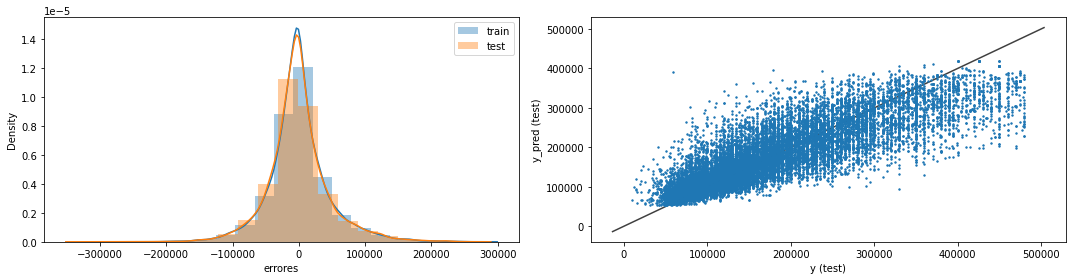

In [331]:
evaluar_modelo(mejor_knn, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

# Arbol de decision

In [332]:
tree_regressor.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [333]:
param_dist_tree = {'max_depth': np.arange(1, 180, 10)
                   ,'random_state':[42]
                   ,'max_features':[3]
              }

In [334]:
model_tree = DecisionTreeRegressor()

In [335]:
tree_random = GridSearchCV(model_tree, param_dist_tree, cv=5)

In [336]:
search_tree = tree_random.fit(X_pca, y3)

## Mejores hiperparametros para arbol de decision

In [337]:
search_tree.best_params_

{'max_depth': 11, 'max_features': 3, 'random_state': 42}

In [338]:
print("Mejor Score: "+str(search_tree.best_score_)+'\n')

Mejor Score: 0.5503237225522449



In [339]:
tree_random.best_estimator_

DecisionTreeRegressor(max_depth=11, max_features=3, random_state=42)

In [340]:
mejor_tree = tree_random.best_estimator_

Raíz del error cuadrático medio en Train: 43653.00748540674
Raíz del error cuadrático medio en Test: 43758.73638502625
El valor del r2 score : 0.7489966386931234


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


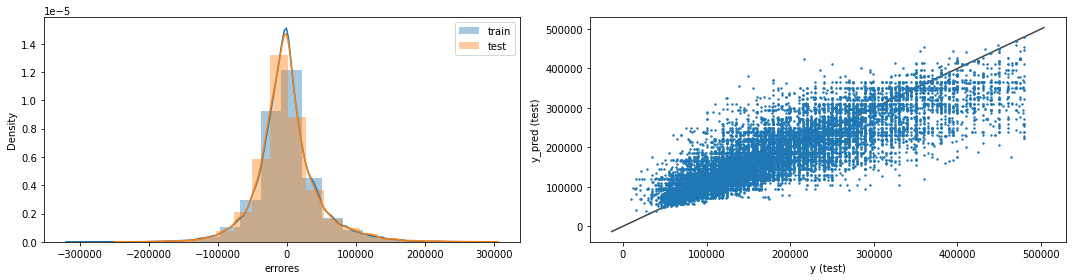

In [341]:
evaluar_modelo(mejor_tree, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

# Regresion lineal

In [342]:
linear_model.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [343]:
param_dist_lm = {'copy_X': [True], 
 'fit_intercept': [True], 
 'normalize': [False]
              }

In [344]:
model_lr = LinearRegression()

In [345]:
lr_random = GridSearchCV(model_lr, param_dist_lm, cv=5)

In [346]:
search_lr = lr_random.fit(X_pca, y3)

In [347]:
mejor_lr = search_lr.best_params_

In [348]:
print("Mejor Score: "+str(search_lr.best_score_)+'\n')

Mejor Score: -51.57375851661245



In [349]:
linear_model = search_lr.best_estimator_

In [350]:
evaluar_modelo(linear_model, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

Raíz del error cuadrático medio en Train: 52881.11205427401
Raíz del error cuadrático medio en Test: 53427.35053931035
El valor del r2 score : 0.6258228449669868


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


### Despues de analizar todos los resultados podemos ver que el modelo arbol de decision tuvo una mejora significativa en los RSME de train y test de aprox. 10000, y tambien en el r2 que paso de 0,60 a 0,748 quedando asi con las mejores metricas

## Regularizacion

### Procederemos realizar la regularizacion de la regresion con Ridge y Lasso con la optimizacion de sus hiperparametros, probar los modelos y ver si mejoran los resultados

In [351]:
from sklearn.linear_model import Ridge, Lasso

## Ridge

In [352]:
reg_ridge = Ridge()

In [353]:
reg_ridge.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [354]:
param_dist_ridge = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
                   ,'copy_X': [True]
                   ,'fit_intercept':[3],
                    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
              }

In [355]:
model_ridge = Ridge()

In [356]:
ridge_random = GridSearchCV(model_ridge, param_dist_ridge, cv=5)

In [357]:
search_ridge = ridge_random.fit(X_pca, y3)

In [358]:
mejor_ridge = search_ridge.best_params_

In [359]:
print("Mejor Score: "+str(search_ridge.best_score_)+'\n')

Mejor Score: 0.5702047505386969



In [360]:
ridge_model = search_ridge.best_estimator_

In [361]:
evaluar_modelo(ridge_model, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

Raíz del error cuadrático medio en Train: 52881.10300205254
Raíz del error cuadrático medio en Test: 53427.37501385128
El valor del r2 score : 0.6258225021531995


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


## Lasso

In [362]:
reg_lasso = Lasso()

In [363]:
reg_lasso.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [364]:
param_dist_lasso = {'alpha': [0,1,0.001]
                   ,'copy_X': [True]
                   ,'fit_intercept':[True],
                    'selection':['cyclic', 'random'],
                    'max_iter':[1000]
              }

In [365]:
model_lasso = Lasso()

In [366]:
lasso_random = GridSearchCV(model_lasso, param_dist_lasso, cv=5)

In [367]:
search_lasso = lasso_random.fit(X_pca, y3)

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391.97130309690476, tolerance: 0.22137012880185622
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are adv

In [368]:
mejor_lasso = search_lasso.best_params_

In [369]:
mejor_lasso

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'selection': 'random'}

In [370]:
print("Mejor Score: "+str(search_lasso.best_score_)+'\n')

Mejor Score: 0.5704165404439985



In [371]:
lasso_model = search_lasso.best_estimator_

Raíz del error cuadrático medio en Train: 53028.888072496906
Raíz del error cuadrático medio en Test: 53620.31564487144
El valor del r2 score : 0.6231151110980109


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


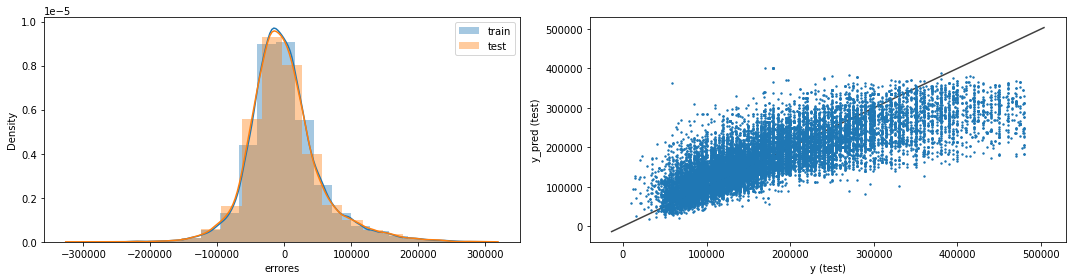

In [372]:
evaluar_modelo(lasso_model, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

### Aqui podemos observar que la regularizacion las metricas rondan en los mismos valores, por lo que para este caso no es muy util

## Polynomial Features

### Ahora probaremos la regresion con polynomial features de 3 grados, la entrenamos, predecimos la y para train y test, volvemos sus datos a la escala real e interpretamos sus resultados

In [373]:
from sklearn.preprocessing import PolynomialFeatures

In [374]:
poly = PolynomialFeatures(3, include_bias=False)
X_train_poly2 = poly.fit_transform(X_train)
X_test_poly2 = poly.fit_transform(X_test)
print(X_train_poly2.shape, X_test_poly2.shape)

(55140, 34) (23632, 34)


In [375]:
linear_model.fit(X_train_poly2, y_train)
print(linear_model.coef_, linear_model.intercept_)
y_train_pred_poly = linear_model.predict(X_train_poly2)
y_test_pred_poly = linear_model.predict(X_test_poly2)

[-2.45937957e+03 -2.72870860e+03 -5.95468960e+02  2.37740369e+03
 -5.18066071e+02 -6.90494638e+03 -1.05228049e+03  4.07777352e+03
  1.65338667e+04  3.73925931e+03  3.28253953e+02  1.96736292e+02
  4.43819820e+02 -1.72712242e+03  4.28951658e+03  1.29579999e+04
  2.85951753e+03 -7.70603649e+03 -1.43228089e+04 -1.56545144e+03
 -3.85274321e+03  1.45391755e+02 -1.89574186e+03  3.19775933e+03
 -4.21287639e+03 -2.81602163e+03  7.23896364e+02 -4.28454182e+02
 -1.45099685e+02  5.97734340e+02 -1.41999865e+01 -9.41463809e+01
  3.70986404e+02 -5.58463484e+02] -595.0938132235206


In [376]:
y_train_pred_poly
y_test_pred_poly

array([0.33326594, 0.18456454, 0.64911546, ..., 0.23076444, 0.29453864,
       0.18167938])

In [377]:
y_train_pred_desesc_poly = scaler_variables_dependientes.inverse_transform(y_train_pred_poly.reshape(-1, 1))
y_test_pred_desesc_poly = scaler_variables_dependientes.inverse_transform(y_test_pred_poly.reshape(-1, 1))
    
y_train_desesc_poly = scaler_variables_dependientes.inverse_transform(y_train.values.reshape(-1, 1))
y_test_desesc_poly = scaler_variables_dependientes.inverse_transform(y_test.values.reshape(-1, 1))

In [378]:
rmse_train_poly = np.sqrt(mean_squared_error(y_train_desesc_poly, y_train_pred_desesc_poly))
rmse_testa_poly = np.sqrt(mean_squared_error(y_test_desesc_poly, y_test_pred_desesc_poly))

In [379]:
rmse_train_poly

49222.99609377751

In [380]:
rmse_testa_poly

49982.935495168924

In [381]:
r2_poly=r2_score(y_test_desesc_poly,y_test_pred_desesc_poly)
print(f'El valor del r2 score : {r2_poly}')

El valor del r2 score : 0.672513418563655


### Podemos ver que las metricas de RSME mejoran al incorporar atributos polinomicos, llegando a un valor por debajo de los 50000,  y el r2 que llega a 0.67

## RANDOM FOREST

### Realizaremos este modelo avanzado con optimizacion de sus hiperparametros

In [382]:
from sklearn.ensemble import RandomForestRegressor

In [383]:
random_forest = RandomForestRegressor()

In [238]:
random_forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [239]:
param_dist_rf = {'n_estimators': [0,10,20,30,40]
                   ,'max_depth': [30]
                   ,'random_state':[42]
              }

In [240]:
model_rf = RandomForestRegressor()

In [241]:
rf_random = GridSearchCV(model_rf, param_dist_rf, cv=5)

In [242]:
search_rf = rf_random.fit(X_train, y_train)

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\ensemble\_base.py", line 134, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

In [243]:
mejor_rf = search_rf.best_params_

In [244]:
mejor_rf

{'max_depth': 30, 'n_estimators': 40, 'random_state': 42}

In [245]:
print("Mejor Score: "+str(search_rf.best_score_)+'\n')

Mejor Score: 0.7473021432746079



In [384]:
rf_model = search_rf.best_estimator_

Raíz del error cuadrático medio en Train: 32819.749576623326
Raíz del error cuadrático medio en Test: 42671.04631258097
El valor del r2 score : 0.7613196991244977


C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


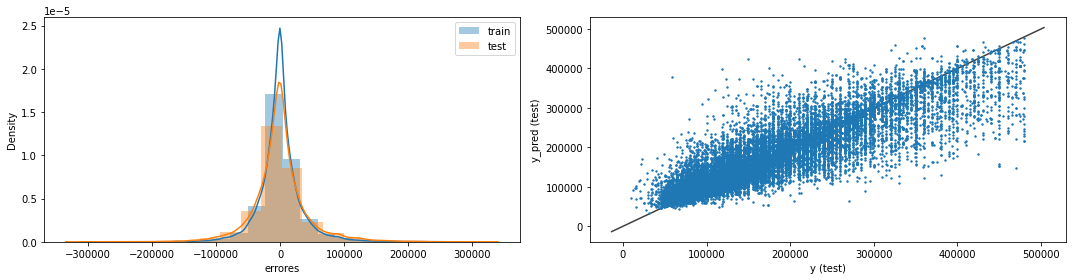

In [385]:
evaluar_modelo(rf_model, scaler_variables_dependientes,X_train, X_test, y_train, y_test)

# Importancia de features

### Graficaremos la importancia de features en un bar plot para determinar las mismas

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Importancias')

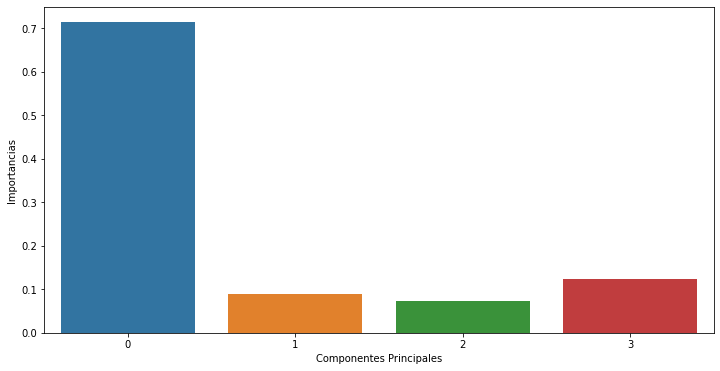

In [386]:
df_X_pca=pd.DataFrame(X_pca)
sns.barplot(df_X_pca.columns, rf_model.feature_importances_)
plt.xlabel("Componentes Principales")
plt.ylabel("Importancias")

### El grafico nos muestra que tiene mucha importancia el primer componente con un poco mas del 70%, el cuarto le sigue pero no supera el 15%. Esperaba que todos los componentes tuvieran relevancia alta ya que se generaron en el proceso de PCA y estos explican aprox el 99% del modelo, pero como vimos anteriormente, el primer componente tiene una importancia significativa y los demas rondan en valores similares por debajo del 15%. Tambien por ser estos componentes generados al condensar la información de las variables originales, es difícil interpretar qué representan.

# Analisis de metricas y comparacion con trabajo del sprint 1

In [387]:
metricas= [[64002.864, 65229.253,-0.02, 49222.996, 49982.935,0.672],
         [34659.211, 53266.291, 0.690,43653.007,43758.736, 0.748],
         [ 46830.376, 53674.902,0.644, 46302.976,46477.413,0.716],
          [ 0, 0,0, 32819.749,42671.046,0.761]]

columnas = ['RMSE_Train_P1', 'RMSE_Test_P1', 'R2_score_P1', 'RMSE_Train P2', 'RMSE_Test', 'R2_score_P2'] # definimos los nombres de las columnas
filas = ['Regresión lineal', 'Árbol de Decisión', 'KNN' , 'Random Forest'] # definimos los nombres de las filas

comparacion = pd.DataFrame(metricas, columns=columnas, index=filas)
comparacion.head()

RMSE_Train_P1  RMSE_Test_P1  R2_score_P1  RMSE_Train P2  \
Regresión lineal       64002.864     65229.253       -0.020      49222.996   
Árbol de Decisión      34659.211     53266.291        0.690      43653.007   
KNN                    46830.376     53674.902        0.644      46302.976   
Random Forest              0.000         0.000        0.000      32819.749   

                   RMSE_Test  R2_score_P2  
Regresión lineal   49982.935        0.672  
Árbol de Decisión  43758.736        0.748  
KNN                46477.413        0.716  
Random Forest      42671.046        0.761

### Como conclusion del proyecto en cuanto al trabajo del sprint 1, se han mejorado todas las metricas de RSME en test y el R2 mejora considerablemente en el modelo de regresion lineal al darle tratamiento y atributos polinomicos, y con el Random forest alcanzamos el 0.761 que fue el mejor. Las mejores metricas las presenta este ultimo con un error en test de 42671.046 y en segundo lugar el arbol de decision con 43758.736 y un R2 de 0.748.
### Las variables relevantes siguieron siendo las mismas que en el sprint 1, pero decidimos aplicar PCA para reducir dimensionalidad y quedarnos con 4 componentes principales que explican mayormente la prediccion y vimos la importancia de cada uno

### Tambien vuelvo a destacar que se manejo mejor el tema de eliminacion de outliers (se tuvo un metodo para hacerlo, no en el sprint 1), se escalaron los datos, tambien agregamos como variable la importancia del barrio con encoding. 
### Debo decir que me gusto mucho mas el tratamiento de este proyecto, ya que maneje mas herramientas como regularizacion, optimizacion de hiperparametros y random forest, ademas de lo nombrado anteriormente y que todo esto me permitio mejorar el modelo, tambien que fue muy util la funcion pandas profile para hacer un analisis exploratorio mas fino.
### Como mejora propondria darle mas tratamiento al modelo random forest porque se puede observar la posibilidad de overfitting ya que falla menos en train que en test, y tambien tratar de bajar los errores del RSME que aunque bajaron con respecto al sprint 1, se puede mejorar.